# TensorFlow Classification

## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

### Clean the Data

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

**Normalize**

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


### Feature Columns

In [8]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

### Encode Age to Age Groups

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

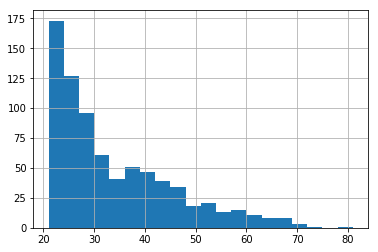

In [10]:
diabetes['Age'].hist(bins=20)

In [11]:
bins = [0,30,50,70,100]
labels =[0,1,2,3]
diabetes["Age_buckets"] = pd.cut(diabetes["Age"],bins=bins, labels=labels, include_lowest=True)

### Putting them together

### Train Test Split

In [12]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Age_buckets
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,1


In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Age_buckets              768 non-null category
dtypes: category(1), float64(7), int64(2)
memory usage: 55.0 KB


In [14]:
x_data = diabetes.drop(['Age','Class'],axis=1)

In [15]:
labels = diabetes['Class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [18]:
y_train.shape

(514,)

## Keras

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [95]:
model = Sequential()
#model.add(Dense(2,input_shape = (X_train.shape[1],),activation = 'softmax'))
model.add(Dense(20,input_shape = (X_train.shape[1],),
                activation = 'relu', 
                kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(20,input_shape = (X_train.shape[1],),
                activation = 'relu', 
                kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(10,activation = 'relu',
               kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.5))
#model.add(Dense(10,activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                180       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 22        
Total para

In [96]:
adam = Adam(0.001)
#sgd = SGD(0.005)

In [97]:
y_binary_train= to_categorical(y_train)
y_binary_test = to_categorical(y_test)

In [98]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])

In [99]:
H = model.fit(X_train, y_binary_train, validation_data=(X_test, y_binary_test),epochs = 2000)

Train on 514 samples, validate on 254 samples
Epoch 1/2000
514/514 [==============================] - 2s 5ms/step - loss: 0.7468 - acc: 0.5156 - val_loss: 0.7323 - val_acc: 0.5787
Epoch 2/2000
514/514 [==============================] - 0s 185us/step - loss: 0.7565 - acc: 0.5428 - val_loss: 0.7205 - val_acc: 0.6299
Epoch 3/2000
514/514 [==============================] - 0s 194us/step - loss: 0.7369 - acc: 0.5778 - val_loss: 0.7129 - val_acc: 0.6378
Epoch 4/2000
514/514 [==============================] - 0s 184us/step - loss: 0.7270 - acc: 0.6187 - val_loss: 0.7065 - val_acc: 0.6575
Epoch 5/2000
514/514 [==============================] - 0s 186us/step - loss: 0.7074 - acc: 0.6459 - val_loss: 0.7008 - val_acc: 0.6575
Epoch 6/2000
514/514 [==============================] - 0s 187us/step - loss: 0.7141 - acc: 0.6304 - val_loss: 0.6974 - val_acc: 0.6575
Epoch 7/2000
514/514 [==============================] - 0s 182us/step - loss: 0.7037 - acc: 0.6401 - val_loss: 0.6939 - val_acc: 0.6575
Epoc

514/514 [==============================] - 0s 187us/step - loss: 0.6343 - acc: 0.6518 - val_loss: 0.6140 - val_acc: 0.6575
Epoch 61/2000
514/514 [==============================] - 0s 184us/step - loss: 0.6312 - acc: 0.6712 - val_loss: 0.6122 - val_acc: 0.6575
Epoch 62/2000
514/514 [==============================] - 0s 185us/step - loss: 0.6180 - acc: 0.6829 - val_loss: 0.6091 - val_acc: 0.6575
Epoch 63/2000
514/514 [==============================] - 0s 175us/step - loss: 0.6312 - acc: 0.6732 - val_loss: 0.6075 - val_acc: 0.6575
Epoch 64/2000
514/514 [==============================] - 0s 180us/step - loss: 0.6223 - acc: 0.6809 - val_loss: 0.6049 - val_acc: 0.6575
Epoch 65/2000
514/514 [==============================] - 0s 177us/step - loss: 0.6149 - acc: 0.6790 - val_loss: 0.6024 - val_acc: 0.6535
Epoch 66/2000
514/514 [==============================] - 0s 180us/step - loss: 0.6186 - acc: 0.6770 - val_loss: 0.6047 - val_acc: 0.6575
Epoch 67/2000
514/514 [==============================] 

Epoch 120/2000
514/514 [==============================] - 0s 180us/step - loss: 0.5661 - acc: 0.7218 - val_loss: 0.5218 - val_acc: 0.7756
Epoch 121/2000
514/514 [==============================] - 0s 181us/step - loss: 0.5624 - acc: 0.7257 - val_loss: 0.5222 - val_acc: 0.7795
Epoch 122/2000
514/514 [==============================] - 0s 175us/step - loss: 0.5579 - acc: 0.7082 - val_loss: 0.5213 - val_acc: 0.7795
Epoch 123/2000
514/514 [==============================] - 0s 179us/step - loss: 0.5561 - acc: 0.7140 - val_loss: 0.5214 - val_acc: 0.7756
Epoch 124/2000
514/514 [==============================] - 0s 177us/step - loss: 0.5627 - acc: 0.7179 - val_loss: 0.5307 - val_acc: 0.7677
Epoch 125/2000
514/514 [==============================] - 0s 183us/step - loss: 0.5551 - acc: 0.7062 - val_loss: 0.5255 - val_acc: 0.7756
Epoch 126/2000
514/514 [==============================] - 0s 180us/step - loss: 0.5605 - acc: 0.7218 - val_loss: 0.5239 - val_acc: 0.7717
Epoch 127/2000
514/514 [==========

514/514 [==============================] - 0s 183us/step - loss: 0.5435 - acc: 0.7276 - val_loss: 0.5021 - val_acc: 0.7677
Epoch 180/2000
514/514 [==============================] - 0s 179us/step - loss: 0.5568 - acc: 0.7374 - val_loss: 0.4983 - val_acc: 0.7835
Epoch 181/2000
514/514 [==============================] - 0s 179us/step - loss: 0.5424 - acc: 0.7354 - val_loss: 0.4972 - val_acc: 0.7913
Epoch 182/2000
514/514 [==============================] - 0s 178us/step - loss: 0.5485 - acc: 0.7160 - val_loss: 0.4974 - val_acc: 0.7874
Epoch 183/2000
514/514 [==============================] - 0s 180us/step - loss: 0.5291 - acc: 0.7510 - val_loss: 0.4978 - val_acc: 0.7874
Epoch 184/2000
514/514 [==============================] - 0s 176us/step - loss: 0.5142 - acc: 0.7665 - val_loss: 0.4989 - val_acc: 0.7598
Epoch 185/2000
514/514 [==============================] - 0s 190us/step - loss: 0.5478 - acc: 0.7471 - val_loss: 0.4967 - val_acc: 0.7717
Epoch 186/2000
514/514 [=========================

514/514 [==============================] - 0s 190us/step - loss: 0.5164 - acc: 0.7646 - val_loss: 0.4912 - val_acc: 0.7717
Epoch 239/2000
514/514 [==============================] - 0s 178us/step - loss: 0.5451 - acc: 0.7198 - val_loss: 0.4923 - val_acc: 0.7717
Epoch 240/2000
514/514 [==============================] - 0s 192us/step - loss: 0.5633 - acc: 0.7315 - val_loss: 0.4934 - val_acc: 0.7756
Epoch 241/2000
514/514 [==============================] - 0s 195us/step - loss: 0.5163 - acc: 0.7412 - val_loss: 0.4914 - val_acc: 0.7795
Epoch 242/2000
514/514 [==============================] - 0s 235us/step - loss: 0.5291 - acc: 0.7549 - val_loss: 0.4901 - val_acc: 0.7795
Epoch 243/2000
514/514 [==============================] - 0s 208us/step - loss: 0.5014 - acc: 0.7626 - val_loss: 0.4901 - val_acc: 0.7756
Epoch 244/2000
514/514 [==============================] - 0s 204us/step - loss: 0.5127 - acc: 0.7665 - val_loss: 0.4944 - val_acc: 0.7677
Epoch 245/2000
514/514 [=========================

514/514 [==============================] - 0s 183us/step - loss: 0.5308 - acc: 0.7490 - val_loss: 0.4903 - val_acc: 0.7795
Epoch 298/2000
514/514 [==============================] - 0s 182us/step - loss: 0.5213 - acc: 0.7588 - val_loss: 0.4900 - val_acc: 0.7677
Epoch 299/2000
514/514 [==============================] - 0s 189us/step - loss: 0.5219 - acc: 0.7335 - val_loss: 0.4881 - val_acc: 0.7717
Epoch 300/2000
514/514 [==============================] - 0s 183us/step - loss: 0.5158 - acc: 0.7665 - val_loss: 0.4896 - val_acc: 0.7992
Epoch 301/2000
514/514 [==============================] - 0s 193us/step - loss: 0.5227 - acc: 0.7257 - val_loss: 0.4911 - val_acc: 0.7756
Epoch 302/2000
514/514 [==============================] - 0s 190us/step - loss: 0.5119 - acc: 0.7510 - val_loss: 0.4895 - val_acc: 0.7677
Epoch 303/2000
514/514 [==============================] - 0s 185us/step - loss: 0.5368 - acc: 0.7471 - val_loss: 0.4895 - val_acc: 0.7874
Epoch 304/2000
514/514 [=========================

514/514 [==============================] - 0s 177us/step - loss: 0.5287 - acc: 0.7354 - val_loss: 0.4848 - val_acc: 0.7717
Epoch 357/2000
514/514 [==============================] - 0s 177us/step - loss: 0.5318 - acc: 0.7490 - val_loss: 0.4850 - val_acc: 0.7677
Epoch 358/2000
514/514 [==============================] - 0s 178us/step - loss: 0.5274 - acc: 0.7412 - val_loss: 0.4891 - val_acc: 0.7795
Epoch 359/2000
514/514 [==============================] - 0s 177us/step - loss: 0.5105 - acc: 0.7393 - val_loss: 0.4862 - val_acc: 0.7638
Epoch 360/2000
514/514 [==============================] - 0s 187us/step - loss: 0.5079 - acc: 0.7451 - val_loss: 0.4867 - val_acc: 0.7677
Epoch 361/2000
514/514 [==============================] - 0s 183us/step - loss: 0.4950 - acc: 0.7646 - val_loss: 0.4855 - val_acc: 0.7677
Epoch 362/2000
514/514 [==============================] - 0s 177us/step - loss: 0.4943 - acc: 0.7432 - val_loss: 0.4837 - val_acc: 0.7795
Epoch 363/2000
514/514 [=========================

514/514 [==============================] - 0s 190us/step - loss: 0.4942 - acc: 0.7626 - val_loss: 0.4879 - val_acc: 0.7874
Epoch 416/2000
514/514 [==============================] - 0s 192us/step - loss: 0.5118 - acc: 0.7451 - val_loss: 0.4885 - val_acc: 0.7795
Epoch 417/2000
514/514 [==============================] - 0s 188us/step - loss: 0.5319 - acc: 0.7296 - val_loss: 0.4862 - val_acc: 0.7756
Epoch 418/2000
514/514 [==============================] - 0s 192us/step - loss: 0.5017 - acc: 0.7646 - val_loss: 0.4889 - val_acc: 0.7717
Epoch 419/2000
514/514 [==============================] - 0s 183us/step - loss: 0.5273 - acc: 0.7374 - val_loss: 0.4889 - val_acc: 0.7756
Epoch 420/2000
514/514 [==============================] - 0s 185us/step - loss: 0.5187 - acc: 0.7626 - val_loss: 0.4857 - val_acc: 0.7717
Epoch 421/2000
514/514 [==============================] - 0s 183us/step - loss: 0.5248 - acc: 0.7412 - val_loss: 0.4851 - val_acc: 0.7756
Epoch 422/2000
514/514 [=========================

514/514 [==============================] - 0s 192us/step - loss: 0.5055 - acc: 0.7549 - val_loss: 0.4792 - val_acc: 0.7717
Epoch 475/2000
514/514 [==============================] - 0s 180us/step - loss: 0.5151 - acc: 0.7393 - val_loss: 0.4820 - val_acc: 0.7795
Epoch 476/2000
514/514 [==============================] - 0s 182us/step - loss: 0.5222 - acc: 0.7412 - val_loss: 0.4799 - val_acc: 0.7756
Epoch 477/2000
514/514 [==============================] - 0s 182us/step - loss: 0.5361 - acc: 0.7218 - val_loss: 0.4849 - val_acc: 0.7717
Epoch 478/2000
514/514 [==============================] - 0s 183us/step - loss: 0.5144 - acc: 0.7451 - val_loss: 0.4819 - val_acc: 0.7756
Epoch 479/2000
514/514 [==============================] - 0s 183us/step - loss: 0.5260 - acc: 0.7374 - val_loss: 0.4952 - val_acc: 0.7598
Epoch 480/2000
514/514 [==============================] - 0s 185us/step - loss: 0.5338 - acc: 0.7393 - val_loss: 0.4815 - val_acc: 0.7795
Epoch 481/2000
514/514 [=========================

514/514 [==============================] - 0s 182us/step - loss: 0.5172 - acc: 0.7451 - val_loss: 0.4769 - val_acc: 0.7677
Epoch 534/2000
514/514 [==============================] - 0s 185us/step - loss: 0.5072 - acc: 0.7374 - val_loss: 0.4801 - val_acc: 0.7677
Epoch 535/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4830 - acc: 0.7704 - val_loss: 0.4762 - val_acc: 0.7717
Epoch 536/2000
514/514 [==============================] - 0s 178us/step - loss: 0.5152 - acc: 0.7529 - val_loss: 0.4784 - val_acc: 0.7677
Epoch 537/2000
514/514 [==============================] - 0s 182us/step - loss: 0.5124 - acc: 0.7685 - val_loss: 0.4777 - val_acc: 0.7717
Epoch 538/2000
514/514 [==============================] - 0s 180us/step - loss: 0.5291 - acc: 0.7510 - val_loss: 0.4800 - val_acc: 0.7756
Epoch 539/2000
514/514 [==============================] - 0s 181us/step - loss: 0.5138 - acc: 0.7412 - val_loss: 0.4773 - val_acc: 0.7795
Epoch 540/2000
514/514 [=========================

514/514 [==============================] - 0s 201us/step - loss: 0.5069 - acc: 0.7451 - val_loss: 0.4830 - val_acc: 0.7756
Epoch 593/2000
514/514 [==============================] - 0s 202us/step - loss: 0.4941 - acc: 0.7315 - val_loss: 0.4802 - val_acc: 0.7756
Epoch 594/2000
514/514 [==============================] - 0s 196us/step - loss: 0.5050 - acc: 0.7626 - val_loss: 0.4800 - val_acc: 0.7717
Epoch 595/2000
514/514 [==============================] - 0s 178us/step - loss: 0.5054 - acc: 0.7412 - val_loss: 0.4818 - val_acc: 0.7874
Epoch 596/2000
514/514 [==============================] - 0s 186us/step - loss: 0.5006 - acc: 0.7607 - val_loss: 0.4797 - val_acc: 0.7835
Epoch 597/2000
514/514 [==============================] - 0s 184us/step - loss: 0.5007 - acc: 0.7626 - val_loss: 0.4800 - val_acc: 0.7677
Epoch 598/2000
514/514 [==============================] - 0s 181us/step - loss: 0.5356 - acc: 0.7335 - val_loss: 0.4795 - val_acc: 0.7756
Epoch 599/2000
514/514 [=========================

514/514 [==============================] - 0s 189us/step - loss: 0.5170 - acc: 0.7335 - val_loss: 0.4774 - val_acc: 0.7835
Epoch 652/2000
514/514 [==============================] - 0s 183us/step - loss: 0.4979 - acc: 0.7471 - val_loss: 0.4764 - val_acc: 0.7874
Epoch 653/2000
514/514 [==============================] - 0s 180us/step - loss: 0.5186 - acc: 0.7549 - val_loss: 0.4759 - val_acc: 0.7874
Epoch 654/2000
514/514 [==============================] - 0s 189us/step - loss: 0.5106 - acc: 0.7665 - val_loss: 0.4787 - val_acc: 0.7913
Epoch 655/2000
514/514 [==============================] - 0s 194us/step - loss: 0.5268 - acc: 0.7471 - val_loss: 0.4915 - val_acc: 0.7717
Epoch 656/2000
514/514 [==============================] - 0s 184us/step - loss: 0.5267 - acc: 0.7237 - val_loss: 0.4877 - val_acc: 0.7874
Epoch 657/2000
514/514 [==============================] - 0s 188us/step - loss: 0.4967 - acc: 0.7646 - val_loss: 0.4884 - val_acc: 0.7874
Epoch 658/2000
514/514 [=========================

514/514 [==============================] - 0s 189us/step - loss: 0.5101 - acc: 0.7432 - val_loss: 0.4850 - val_acc: 0.7795
Epoch 711/2000
514/514 [==============================] - 0s 184us/step - loss: 0.5133 - acc: 0.7490 - val_loss: 0.4841 - val_acc: 0.7874
Epoch 712/2000
514/514 [==============================] - 0s 184us/step - loss: 0.5069 - acc: 0.7607 - val_loss: 0.4833 - val_acc: 0.7953
Epoch 713/2000
514/514 [==============================] - 0s 185us/step - loss: 0.5066 - acc: 0.7704 - val_loss: 0.4827 - val_acc: 0.7874
Epoch 714/2000
514/514 [==============================] - 0s 186us/step - loss: 0.5068 - acc: 0.7626 - val_loss: 0.4851 - val_acc: 0.7717
Epoch 715/2000
514/514 [==============================] - 0s 180us/step - loss: 0.5192 - acc: 0.7724 - val_loss: 0.4818 - val_acc: 0.7835
Epoch 716/2000
514/514 [==============================] - 0s 189us/step - loss: 0.5115 - acc: 0.7529 - val_loss: 0.4834 - val_acc: 0.7874
Epoch 717/2000
514/514 [=========================

514/514 [==============================] - 0s 247us/step - loss: 0.4910 - acc: 0.7685 - val_loss: 0.4784 - val_acc: 0.7795
Epoch 770/2000
514/514 [==============================] - 0s 289us/step - loss: 0.4901 - acc: 0.7412 - val_loss: 0.4782 - val_acc: 0.7795
Epoch 771/2000
514/514 [==============================] - 0s 212us/step - loss: 0.5067 - acc: 0.7490 - val_loss: 0.4792 - val_acc: 0.7756
Epoch 772/2000
514/514 [==============================] - 0s 222us/step - loss: 0.5140 - acc: 0.7568 - val_loss: 0.4762 - val_acc: 0.7874
Epoch 773/2000
514/514 [==============================] - 0s 207us/step - loss: 0.4985 - acc: 0.7471 - val_loss: 0.4758 - val_acc: 0.7835
Epoch 774/2000
514/514 [==============================] - 0s 215us/step - loss: 0.5194 - acc: 0.7665 - val_loss: 0.4765 - val_acc: 0.7795
Epoch 775/2000
514/514 [==============================] - 0s 194us/step - loss: 0.4914 - acc: 0.7607 - val_loss: 0.4794 - val_acc: 0.7756
Epoch 776/2000
514/514 [=========================

514/514 [==============================] - 0s 214us/step - loss: 0.4750 - acc: 0.7840 - val_loss: 0.4755 - val_acc: 0.7717
Epoch 829/2000
514/514 [==============================] - 0s 216us/step - loss: 0.4806 - acc: 0.7763 - val_loss: 0.4770 - val_acc: 0.7795
Epoch 830/2000
514/514 [==============================] - 0s 199us/step - loss: 0.5017 - acc: 0.7588 - val_loss: 0.4808 - val_acc: 0.7835
Epoch 831/2000
514/514 [==============================] - 0s 202us/step - loss: 0.4785 - acc: 0.7646 - val_loss: 0.4768 - val_acc: 0.7717
Epoch 832/2000
514/514 [==============================] - 0s 196us/step - loss: 0.5254 - acc: 0.7296 - val_loss: 0.4777 - val_acc: 0.7756
Epoch 833/2000
514/514 [==============================] - 0s 213us/step - loss: 0.4957 - acc: 0.7451 - val_loss: 0.4828 - val_acc: 0.7756
Epoch 834/2000
514/514 [==============================] - 0s 216us/step - loss: 0.4826 - acc: 0.7568 - val_loss: 0.4776 - val_acc: 0.7717
Epoch 835/2000
514/514 [=========================

514/514 [==============================] - 0s 208us/step - loss: 0.4872 - acc: 0.7646 - val_loss: 0.4757 - val_acc: 0.7835
Epoch 888/2000
514/514 [==============================] - 0s 252us/step - loss: 0.5112 - acc: 0.7626 - val_loss: 0.4769 - val_acc: 0.7874
Epoch 889/2000
514/514 [==============================] - 0s 348us/step - loss: 0.5185 - acc: 0.7549 - val_loss: 0.4761 - val_acc: 0.7913
Epoch 890/2000
514/514 [==============================] - 0s 237us/step - loss: 0.5246 - acc: 0.7432 - val_loss: 0.4828 - val_acc: 0.7835
Epoch 891/2000
514/514 [==============================] - 0s 240us/step - loss: 0.5003 - acc: 0.7412 - val_loss: 0.4803 - val_acc: 0.7717
Epoch 892/2000
514/514 [==============================] - 0s 217us/step - loss: 0.5259 - acc: 0.7393 - val_loss: 0.4774 - val_acc: 0.7795
Epoch 893/2000
514/514 [==============================] - 0s 223us/step - loss: 0.4956 - acc: 0.7490 - val_loss: 0.4757 - val_acc: 0.7835
Epoch 894/2000
514/514 [=========================

514/514 [==============================] - 0s 199us/step - loss: 0.5075 - acc: 0.7412 - val_loss: 0.4769 - val_acc: 0.7835
Epoch 947/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4935 - acc: 0.7490 - val_loss: 0.4769 - val_acc: 0.7835
Epoch 948/2000
514/514 [==============================] - 0s 201us/step - loss: 0.4920 - acc: 0.7626 - val_loss: 0.4782 - val_acc: 0.7913
Epoch 949/2000
514/514 [==============================] - 0s 206us/step - loss: 0.4955 - acc: 0.7743 - val_loss: 0.4762 - val_acc: 0.7913
Epoch 950/2000
514/514 [==============================] - 0s 206us/step - loss: 0.4940 - acc: 0.7374 - val_loss: 0.4744 - val_acc: 0.7874
Epoch 951/2000
514/514 [==============================] - 0s 206us/step - loss: 0.5082 - acc: 0.7743 - val_loss: 0.4756 - val_acc: 0.7874
Epoch 952/2000
514/514 [==============================] - 0s 201us/step - loss: 0.4890 - acc: 0.7432 - val_loss: 0.4754 - val_acc: 0.7756
Epoch 953/2000
514/514 [=========================

514/514 [==============================] - 0s 189us/step - loss: 0.4876 - acc: 0.7607 - val_loss: 0.4734 - val_acc: 0.7835
Epoch 1006/2000
514/514 [==============================] - 0s 195us/step - loss: 0.5008 - acc: 0.7802 - val_loss: 0.4741 - val_acc: 0.7874
Epoch 1007/2000
514/514 [==============================] - 0s 193us/step - loss: 0.5150 - acc: 0.7393 - val_loss: 0.4754 - val_acc: 0.7913
Epoch 1008/2000
514/514 [==============================] - 0s 191us/step - loss: 0.4986 - acc: 0.7451 - val_loss: 0.4787 - val_acc: 0.7756
Epoch 1009/2000
514/514 [==============================] - 0s 195us/step - loss: 0.4991 - acc: 0.7549 - val_loss: 0.4789 - val_acc: 0.7795
Epoch 1010/2000
514/514 [==============================] - 0s 205us/step - loss: 0.4870 - acc: 0.7490 - val_loss: 0.4768 - val_acc: 0.7795
Epoch 1011/2000
514/514 [==============================] - 0s 200us/step - loss: 0.4849 - acc: 0.7724 - val_loss: 0.4750 - val_acc: 0.7913
Epoch 1012/2000
514/514 [==================

514/514 [==============================] - 0s 188us/step - loss: 0.5075 - acc: 0.7510 - val_loss: 0.4742 - val_acc: 0.7717
Epoch 1065/2000
514/514 [==============================] - 0s 192us/step - loss: 0.4935 - acc: 0.7529 - val_loss: 0.4752 - val_acc: 0.7913
Epoch 1066/2000
514/514 [==============================] - 0s 192us/step - loss: 0.5128 - acc: 0.7490 - val_loss: 0.4771 - val_acc: 0.7913
Epoch 1067/2000
514/514 [==============================] - 0s 190us/step - loss: 0.5057 - acc: 0.7568 - val_loss: 0.4765 - val_acc: 0.7795
Epoch 1068/2000
514/514 [==============================] - 0s 189us/step - loss: 0.5027 - acc: 0.7549 - val_loss: 0.4772 - val_acc: 0.7717
Epoch 1069/2000
514/514 [==============================] - 0s 190us/step - loss: 0.5192 - acc: 0.7588 - val_loss: 0.4800 - val_acc: 0.7717
Epoch 1070/2000
514/514 [==============================] - 0s 205us/step - loss: 0.4999 - acc: 0.7704 - val_loss: 0.4800 - val_acc: 0.7874
Epoch 1071/2000
514/514 [==================

514/514 [==============================] - 0s 198us/step - loss: 0.5071 - acc: 0.7529 - val_loss: 0.4907 - val_acc: 0.7835
Epoch 1124/2000
514/514 [==============================] - 0s 198us/step - loss: 0.5138 - acc: 0.7393 - val_loss: 0.4847 - val_acc: 0.7795
Epoch 1125/2000
514/514 [==============================] - 0s 194us/step - loss: 0.4904 - acc: 0.7529 - val_loss: 0.4861 - val_acc: 0.7717
Epoch 1126/2000
514/514 [==============================] - 0s 196us/step - loss: 0.4852 - acc: 0.7588 - val_loss: 0.4828 - val_acc: 0.7874
Epoch 1127/2000
514/514 [==============================] - 0s 192us/step - loss: 0.4754 - acc: 0.7724 - val_loss: 0.4839 - val_acc: 0.7756
Epoch 1128/2000
514/514 [==============================] - 0s 196us/step - loss: 0.5109 - acc: 0.7568 - val_loss: 0.4810 - val_acc: 0.7835
Epoch 1129/2000
514/514 [==============================] - 0s 199us/step - loss: 0.4875 - acc: 0.7451 - val_loss: 0.4810 - val_acc: 0.7874
Epoch 1130/2000
514/514 [==================

514/514 [==============================] - 0s 187us/step - loss: 0.5293 - acc: 0.7354 - val_loss: 0.4838 - val_acc: 0.7835
Epoch 1183/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4902 - acc: 0.7607 - val_loss: 0.4784 - val_acc: 0.7874
Epoch 1184/2000
514/514 [==============================] - 0s 193us/step - loss: 0.4967 - acc: 0.7724 - val_loss: 0.4784 - val_acc: 0.7835
Epoch 1185/2000
514/514 [==============================] - 0s 191us/step - loss: 0.5075 - acc: 0.7588 - val_loss: 0.4775 - val_acc: 0.7795
Epoch 1186/2000
514/514 [==============================] - 0s 191us/step - loss: 0.4943 - acc: 0.7665 - val_loss: 0.4760 - val_acc: 0.7835
Epoch 1187/2000
514/514 [==============================] - 0s 196us/step - loss: 0.5214 - acc: 0.7549 - val_loss: 0.4803 - val_acc: 0.7677
Epoch 1188/2000
514/514 [==============================] - 0s 196us/step - loss: 0.5020 - acc: 0.7510 - val_loss: 0.4783 - val_acc: 0.7717
Epoch 1189/2000
514/514 [==================

514/514 [==============================] - 0s 200us/step - loss: 0.4890 - acc: 0.7451 - val_loss: 0.4780 - val_acc: 0.7874
Epoch 1242/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4998 - acc: 0.7607 - val_loss: 0.4767 - val_acc: 0.7874
Epoch 1243/2000
514/514 [==============================] - 0s 197us/step - loss: 0.4982 - acc: 0.7490 - val_loss: 0.4777 - val_acc: 0.7795
Epoch 1244/2000
514/514 [==============================] - 0s 200us/step - loss: 0.4752 - acc: 0.7821 - val_loss: 0.4790 - val_acc: 0.7520
Epoch 1245/2000
514/514 [==============================] - 0s 197us/step - loss: 0.4997 - acc: 0.7646 - val_loss: 0.4810 - val_acc: 0.7559
Epoch 1246/2000
514/514 [==============================] - 0s 199us/step - loss: 0.4953 - acc: 0.7704 - val_loss: 0.4754 - val_acc: 0.7717
Epoch 1247/2000
514/514 [==============================] - 0s 191us/step - loss: 0.4955 - acc: 0.7568 - val_loss: 0.4767 - val_acc: 0.7835
Epoch 1248/2000
514/514 [==================

514/514 [==============================] - 0s 191us/step - loss: 0.4986 - acc: 0.7471 - val_loss: 0.4817 - val_acc: 0.7835
Epoch 1301/2000
514/514 [==============================] - 0s 189us/step - loss: 0.4848 - acc: 0.7626 - val_loss: 0.4799 - val_acc: 0.7756
Epoch 1302/2000
514/514 [==============================] - 0s 188us/step - loss: 0.4866 - acc: 0.7782 - val_loss: 0.4788 - val_acc: 0.7717
Epoch 1303/2000
514/514 [==============================] - 0s 188us/step - loss: 0.5013 - acc: 0.7549 - val_loss: 0.4779 - val_acc: 0.7717
Epoch 1304/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4925 - acc: 0.7490 - val_loss: 0.4787 - val_acc: 0.7677
Epoch 1305/2000
514/514 [==============================] - 0s 186us/step - loss: 0.5106 - acc: 0.7374 - val_loss: 0.4816 - val_acc: 0.7835
Epoch 1306/2000
514/514 [==============================] - 0s 183us/step - loss: 0.4899 - acc: 0.7393 - val_loss: 0.4827 - val_acc: 0.7835
Epoch 1307/2000
514/514 [==================

514/514 [==============================] - 0s 191us/step - loss: 0.4832 - acc: 0.7802 - val_loss: 0.4819 - val_acc: 0.7717
Epoch 1360/2000
514/514 [==============================] - 0s 188us/step - loss: 0.4999 - acc: 0.7529 - val_loss: 0.4837 - val_acc: 0.7756
Epoch 1361/2000
514/514 [==============================] - 0s 193us/step - loss: 0.5201 - acc: 0.7374 - val_loss: 0.4810 - val_acc: 0.7717
Epoch 1362/2000
514/514 [==============================] - 0s 195us/step - loss: 0.4937 - acc: 0.7588 - val_loss: 0.4831 - val_acc: 0.7717
Epoch 1363/2000
514/514 [==============================] - 0s 189us/step - loss: 0.5073 - acc: 0.7490 - val_loss: 0.4819 - val_acc: 0.7756
Epoch 1364/2000
514/514 [==============================] - 0s 188us/step - loss: 0.4873 - acc: 0.7471 - val_loss: 0.4810 - val_acc: 0.7717
Epoch 1365/2000
514/514 [==============================] - 0s 191us/step - loss: 0.4968 - acc: 0.7374 - val_loss: 0.4800 - val_acc: 0.7717
Epoch 1366/2000
514/514 [==================

514/514 [==============================] - 0s 192us/step - loss: 0.5003 - acc: 0.7646 - val_loss: 0.4832 - val_acc: 0.7795
Epoch 1419/2000
514/514 [==============================] - 0s 193us/step - loss: 0.5045 - acc: 0.7412 - val_loss: 0.4880 - val_acc: 0.7795
Epoch 1420/2000
514/514 [==============================] - 0s 187us/step - loss: 0.5068 - acc: 0.7296 - val_loss: 0.4800 - val_acc: 0.7835
Epoch 1421/2000
514/514 [==============================] - 0s 192us/step - loss: 0.5087 - acc: 0.7490 - val_loss: 0.4839 - val_acc: 0.7795
Epoch 1422/2000
514/514 [==============================] - 0s 190us/step - loss: 0.5154 - acc: 0.7432 - val_loss: 0.4806 - val_acc: 0.7756
Epoch 1423/2000
514/514 [==============================] - 0s 188us/step - loss: 0.5075 - acc: 0.7763 - val_loss: 0.4816 - val_acc: 0.7795
Epoch 1424/2000
514/514 [==============================] - 0s 188us/step - loss: 0.4882 - acc: 0.7665 - val_loss: 0.4860 - val_acc: 0.7795
Epoch 1425/2000
514/514 [==================

514/514 [==============================] - 0s 207us/step - loss: 0.5021 - acc: 0.7588 - val_loss: 0.4844 - val_acc: 0.7795
Epoch 1478/2000
514/514 [==============================] - 0s 189us/step - loss: 0.4937 - acc: 0.7432 - val_loss: 0.4866 - val_acc: 0.7756
Epoch 1479/2000
514/514 [==============================] - 0s 199us/step - loss: 0.5196 - acc: 0.7529 - val_loss: 0.4841 - val_acc: 0.7835
Epoch 1480/2000
514/514 [==============================] - 0s 192us/step - loss: 0.5009 - acc: 0.7704 - val_loss: 0.4873 - val_acc: 0.7756
Epoch 1481/2000
514/514 [==============================] - 0s 196us/step - loss: 0.4997 - acc: 0.7490 - val_loss: 0.4819 - val_acc: 0.7756
Epoch 1482/2000
514/514 [==============================] - 0s 196us/step - loss: 0.4876 - acc: 0.7743 - val_loss: 0.4844 - val_acc: 0.7795
Epoch 1483/2000
514/514 [==============================] - 0s 190us/step - loss: 0.5207 - acc: 0.7451 - val_loss: 0.4853 - val_acc: 0.7795
Epoch 1484/2000
514/514 [==================

514/514 [==============================] - 0s 202us/step - loss: 0.5065 - acc: 0.7568 - val_loss: 0.5012 - val_acc: 0.7520
Epoch 1537/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4961 - acc: 0.7354 - val_loss: 0.4837 - val_acc: 0.7874
Epoch 1538/2000
514/514 [==============================] - 0s 194us/step - loss: 0.4951 - acc: 0.7490 - val_loss: 0.4825 - val_acc: 0.7874
Epoch 1539/2000
514/514 [==============================] - 0s 193us/step - loss: 0.4826 - acc: 0.7724 - val_loss: 0.4832 - val_acc: 0.7717
Epoch 1540/2000
514/514 [==============================] - 0s 195us/step - loss: 0.4952 - acc: 0.7549 - val_loss: 0.4851 - val_acc: 0.7756
Epoch 1541/2000
514/514 [==============================] - 0s 195us/step - loss: 0.4888 - acc: 0.7588 - val_loss: 0.4860 - val_acc: 0.7795
Epoch 1542/2000
514/514 [==============================] - 0s 183us/step - loss: 0.4667 - acc: 0.7743 - val_loss: 0.4858 - val_acc: 0.7874
Epoch 1543/2000
514/514 [==================

514/514 [==============================] - 0s 199us/step - loss: 0.4932 - acc: 0.7335 - val_loss: 0.4859 - val_acc: 0.7795
Epoch 1596/2000
514/514 [==============================] - 0s 193us/step - loss: 0.4869 - acc: 0.7704 - val_loss: 0.4904 - val_acc: 0.7756
Epoch 1597/2000
514/514 [==============================] - 0s 194us/step - loss: 0.4882 - acc: 0.7840 - val_loss: 0.4852 - val_acc: 0.7756
Epoch 1598/2000
514/514 [==============================] - 0s 191us/step - loss: 0.4911 - acc: 0.7665 - val_loss: 0.4856 - val_acc: 0.7874
Epoch 1599/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4843 - acc: 0.7821 - val_loss: 0.4866 - val_acc: 0.7835
Epoch 1600/2000
514/514 [==============================] - 0s 201us/step - loss: 0.5076 - acc: 0.7607 - val_loss: 0.4887 - val_acc: 0.7835
Epoch 1601/2000
514/514 [==============================] - 0s 199us/step - loss: 0.4951 - acc: 0.7665 - val_loss: 0.4857 - val_acc: 0.7795
Epoch 1602/2000
514/514 [==================

514/514 [==============================] - 0s 204us/step - loss: 0.5077 - acc: 0.7782 - val_loss: 0.4847 - val_acc: 0.7874
Epoch 1655/2000
514/514 [==============================] - 0s 197us/step - loss: 0.4699 - acc: 0.7510 - val_loss: 0.4861 - val_acc: 0.7795
Epoch 1656/2000
514/514 [==============================] - 0s 190us/step - loss: 0.5002 - acc: 0.7607 - val_loss: 0.4854 - val_acc: 0.7795
Epoch 1657/2000
514/514 [==============================] - 0s 194us/step - loss: 0.5031 - acc: 0.7529 - val_loss: 0.4857 - val_acc: 0.7795
Epoch 1658/2000
514/514 [==============================] - 0s 192us/step - loss: 0.4779 - acc: 0.7510 - val_loss: 0.4863 - val_acc: 0.7717
Epoch 1659/2000
514/514 [==============================] - 0s 197us/step - loss: 0.4993 - acc: 0.7607 - val_loss: 0.4865 - val_acc: 0.7795
Epoch 1660/2000
514/514 [==============================] - 0s 194us/step - loss: 0.4816 - acc: 0.7743 - val_loss: 0.4865 - val_acc: 0.7677
Epoch 1661/2000
514/514 [==================

514/514 [==============================] - 0s 192us/step - loss: 0.5020 - acc: 0.7704 - val_loss: 0.4841 - val_acc: 0.7717
Epoch 1714/2000
514/514 [==============================] - 0s 185us/step - loss: 0.5044 - acc: 0.7665 - val_loss: 0.4854 - val_acc: 0.7756
Epoch 1715/2000
514/514 [==============================] - 0s 198us/step - loss: 0.4783 - acc: 0.7840 - val_loss: 0.4856 - val_acc: 0.7677
Epoch 1716/2000
514/514 [==============================] - 0s 196us/step - loss: 0.4881 - acc: 0.7432 - val_loss: 0.4842 - val_acc: 0.7756
Epoch 1717/2000
514/514 [==============================] - 0s 187us/step - loss: 0.4845 - acc: 0.7510 - val_loss: 0.4885 - val_acc: 0.7795
Epoch 1718/2000
514/514 [==============================] - 0s 185us/step - loss: 0.4807 - acc: 0.7821 - val_loss: 0.4867 - val_acc: 0.7795
Epoch 1719/2000
514/514 [==============================] - 0s 186us/step - loss: 0.4871 - acc: 0.7685 - val_loss: 0.4860 - val_acc: 0.7756
Epoch 1720/2000
514/514 [==================

514/514 [==============================] - 0s 215us/step - loss: 0.4868 - acc: 0.7607 - val_loss: 0.4855 - val_acc: 0.7835
Epoch 1773/2000
514/514 [==============================] - 0s 198us/step - loss: 0.4968 - acc: 0.7646 - val_loss: 0.4851 - val_acc: 0.7795
Epoch 1774/2000
514/514 [==============================] - 0s 205us/step - loss: 0.5086 - acc: 0.7626 - val_loss: 0.4864 - val_acc: 0.7835
Epoch 1775/2000
514/514 [==============================] - 0s 190us/step - loss: 0.4984 - acc: 0.7471 - val_loss: 0.4832 - val_acc: 0.7756
Epoch 1776/2000
514/514 [==============================] - 0s 196us/step - loss: 0.4976 - acc: 0.7588 - val_loss: 0.4841 - val_acc: 0.7717
Epoch 1777/2000
514/514 [==============================] - 0s 195us/step - loss: 0.5114 - acc: 0.7296 - val_loss: 0.4845 - val_acc: 0.7717
Epoch 1778/2000
514/514 [==============================] - 0s 200us/step - loss: 0.4854 - acc: 0.7432 - val_loss: 0.4845 - val_acc: 0.7795
Epoch 1779/2000
514/514 [==================

514/514 [==============================] - 0s 211us/step - loss: 0.4849 - acc: 0.7782 - val_loss: 0.4953 - val_acc: 0.7638
Epoch 1832/2000
514/514 [==============================] - 0s 195us/step - loss: 0.5027 - acc: 0.7471 - val_loss: 0.4921 - val_acc: 0.7598
Epoch 1833/2000
514/514 [==============================] - 0s 199us/step - loss: 0.5069 - acc: 0.7704 - val_loss: 0.4918 - val_acc: 0.7638
Epoch 1834/2000
514/514 [==============================] - 0s 196us/step - loss: 0.5013 - acc: 0.7490 - val_loss: 0.4887 - val_acc: 0.7717
Epoch 1835/2000
514/514 [==============================] - 0s 198us/step - loss: 0.4885 - acc: 0.7646 - val_loss: 0.4873 - val_acc: 0.7677
Epoch 1836/2000
514/514 [==============================] - 0s 195us/step - loss: 0.4843 - acc: 0.7529 - val_loss: 0.4878 - val_acc: 0.7677
Epoch 1837/2000
514/514 [==============================] - 0s 193us/step - loss: 0.4970 - acc: 0.7588 - val_loss: 0.4863 - val_acc: 0.7717
Epoch 1838/2000
514/514 [==================

514/514 [==============================] - 0s 208us/step - loss: 0.4827 - acc: 0.7490 - val_loss: 0.4829 - val_acc: 0.7756
Epoch 1891/2000
514/514 [==============================] - 0s 198us/step - loss: 0.4889 - acc: 0.7704 - val_loss: 0.4868 - val_acc: 0.7677
Epoch 1892/2000
514/514 [==============================] - 0s 199us/step - loss: 0.5227 - acc: 0.7549 - val_loss: 0.4858 - val_acc: 0.7756
Epoch 1893/2000
514/514 [==============================] - 0s 194us/step - loss: 0.4994 - acc: 0.7510 - val_loss: 0.4848 - val_acc: 0.7913
Epoch 1894/2000
514/514 [==============================] - 0s 192us/step - loss: 0.4884 - acc: 0.7354 - val_loss: 0.4838 - val_acc: 0.7874
Epoch 1895/2000
514/514 [==============================] - 0s 191us/step - loss: 0.4824 - acc: 0.7665 - val_loss: 0.4850 - val_acc: 0.7756
Epoch 1896/2000
514/514 [==============================] - 0s 207us/step - loss: 0.4756 - acc: 0.7860 - val_loss: 0.4837 - val_acc: 0.7717
Epoch 1897/2000
514/514 [==================

514/514 [==============================] - 0s 213us/step - loss: 0.5008 - acc: 0.7763 - val_loss: 0.4805 - val_acc: 0.7756
Epoch 1950/2000
514/514 [==============================] - 0s 212us/step - loss: 0.4975 - acc: 0.7685 - val_loss: 0.4835 - val_acc: 0.7835
Epoch 1951/2000
514/514 [==============================] - 0s 240us/step - loss: 0.5034 - acc: 0.7724 - val_loss: 0.4836 - val_acc: 0.7835
Epoch 1952/2000
514/514 [==============================] - 0s 235us/step - loss: 0.5244 - acc: 0.7432 - val_loss: 0.4856 - val_acc: 0.7756
Epoch 1953/2000
514/514 [==============================] - 0s 223us/step - loss: 0.4925 - acc: 0.7743 - val_loss: 0.4821 - val_acc: 0.7795
Epoch 1954/2000
514/514 [==============================] - 0s 236us/step - loss: 0.4813 - acc: 0.7763 - val_loss: 0.4853 - val_acc: 0.7835
Epoch 1955/2000
514/514 [==============================] - 0s 237us/step - loss: 0.4845 - acc: 0.7568 - val_loss: 0.4813 - val_acc: 0.7756
Epoch 1956/2000
514/514 [==================

In [44]:
H.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

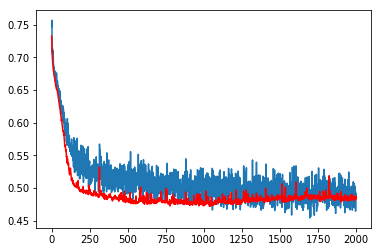

In [100]:
plt.plot(H.history["loss"])
plt.plot(H.history["val_loss"], 'r')

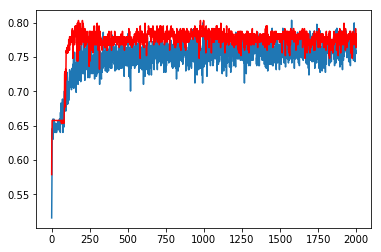

In [101]:
plt.plot(H.history["acc"])
plt.plot(H.history["val_acc"], 'r')

### Predict

In [102]:
y_test.shape

(254,)

In [103]:
y_pred_softmax = model.predict(X_test)

In [104]:
import numpy as np

In [105]:
y_pred = np.argmax(y_pred_softmax, axis=1)

### Evaluation

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       167
           1       0.69      0.67      0.68        87

   micro avg       0.78      0.78      0.78       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.78      0.78      0.78       254

